### Crime visualizations using Open Data DC

In [6]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")
import re

#### Neighborhood cluster data

In [8]:
##import
clusters = pd.read_csv("../../data/open_data_dc/Neighborhood_Clusters.csv", encoding='utf-8')
clusters.head()

,OBJECTID,WEB_URL,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN
0,1,http://planning.dc.gov/,Cluster 16,"Colonial Village, Shepherd Park, North Portal ...",Original,{8D235E97-D58C-4891-943E-307143103BD9},NaN,NaN,NaN,NaN,0,0
1,2,NaN,Cluster 41,Rock Creek Park,Additional,{939C23A8-8EE2-4B4F-85EE-88281BCCC9A0},NaN,NaN,NaN,NaN,0,0
2,3,http://planning.dc.gov/,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},NaN,NaN,NaN,NaN,0,0
3,4,http://planning.dc.gov/,Cluster 17,"Takoma, Brightwood, Manor Park",Original,{5BF4BCEC-5022-4B96-9577-C0246154197C},NaN,NaN,NaN,NaN,0,0
4,5,NaN,Cluster 40,Walter Reed,Additional,{C6705A7B-212E-419A-93CB-DA60707D0C37},NaN,NaN,NaN,NaN,0,0


#### 2024 Crime Data

In [10]:
##import data
crime_2024 = pd.read_csv("../../data/open_data_dc/Crime_Incidents_in_2024.csv", encoding='utf-8')
crime_2024.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,009802 2,9802.0,Precinct 125,38.829204,-76.999532,NaN,2018/04/15 16:07:00+00,2018/04/15 17:34:56+00,635657969,NaN
1,399950.92,138510.6000,23168245,2024/05/09 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1800 - 1829 BLOCK OF 4TH STREET NE,399950.920000,138510.600000,...,008702 3,8702.0,Precinct 75,38.914461,-77.000566,NaN,2023/10/12 10:40:00+00,2023/10/12 11:45:00+00,635932226,NaN
2,404689.01,135000.8400,24000194,2024/01/01 11:50:13+00,MIDNIGHT,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF E STREET SE,404689.010000,135000.840000,...,007703 2,7703.0,Precinct 103,38.882831,-76.945957,NaN,2024/01/01 10:54:00+00,2024/01/01 11:40:00+00,635932616,NaN
3,401508.58,137047.0200,24000222,2024/01/01 13:56:32+00,DAY,OTHERS,THEFT/OTHER,812 - 899 BLOCK OF BLADENSBURG ROAD NE,401508.580000,137047.020000,...,008903 3,8903.0,Precinct 79,38.901275,-76.982608,NaN,2024/01/01 13:39:00+00,2024/01/01 13:50:00+00,635932617,NaN
4,393930.75,143053.2700,24000236,2024/01/01 14:59:02+00,DAY,OTHERS,THEFT/OTHER,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,143053.270000,...,001402 3,1402.0,Precinct 138,38.955362,-77.070022,NaN,2024/01/01 13:51:00+00,2024/01/01 13:54:00+00,635932618,NaN


In [11]:
##join data
with_neighborhoods = pd.merge(crime_2024, clusters, how = "left", left_on = "NEIGHBORHOOD_CLUSTER", right_on = "NAME") 
with_neighborhoods.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN
0,400040.61,129046.4721,18060158,2024/07/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,400 - 599 BLOCK OF CHESAPEAKE STREET SE,400040.610046,129046.472149,...,Cluster 39,"Congress Heights, Bellevue, Washington Highlands",Original,{EAEFFB60-B831-4B92-B7A5-B827FD2308B2},NaN,NaN,NaN,NaN,0.0,0.0
1,399950.92,138510.6000,23168245,2024/05/09 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1800 - 1829 BLOCK OF 4TH STREET NE,399950.920000,138510.600000,...,Cluster 21,"Edgewood, Bloomingdale, Truxton Circle, Eckington",Original,{6CD3BBE1-241C-435B-AEDC-39FB57117D4B},NaN,NaN,NaN,NaN,0.0,0.0
2,404689.01,135000.8400,24000194,2024/01/01 11:50:13+00,MIDNIGHT,OTHERS,THEFT/OTHER,4000 - 4099 BLOCK OF E STREET SE,404689.010000,135000.840000,...,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park",Original,{CB699FF2-52D9-471F-B48A-89EB5DC0AEBB},NaN,NaN,NaN,NaN,0.0,0.0
3,401508.58,137047.0200,24000222,2024/01/01 13:56:32+00,DAY,OTHERS,THEFT/OTHER,812 - 899 BLOCK OF BLADENSBURG ROAD NE,401508.580000,137047.020000,...,Cluster 23,"Ivy City, Arboretum, Trinidad, Carver Langston",Original,{60D6F49B-A6D4-4EC7-9CBE-95E1A0726E16},NaN,NaN,NaN,NaN,0.0,0.0
4,393930.75,143053.2700,24000236,2024/01/01 14:59:02+00,DAY,OTHERS,THEFT/OTHER,5000 - 5099 BLOCK OF CONNECTICUT AVENUE NW,393930.750000,143053.270000,...,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},NaN,NaN,NaN,NaN,0.0,0.0


In [12]:
column_names = with_neighborhoods.columns.to_list()
column_names

['X',
 'Y',
 'CCN',
 'REPORT_DAT',
 'SHIFT',
 'METHOD',
 'OFFENSE',
 'BLOCK',
 'XBLOCK',
 'YBLOCK',
 'WARD',
 'ANC',
 'DISTRICT',
 'PSA',
 'NEIGHBORHOOD_CLUSTER',
 'BLOCK_GROUP',
 'CENSUS_TRACT',
 'VOTING_PRECINCT',
 'LATITUDE',
 'LONGITUDE',
 'BID',
 'START_DATE',
 'END_DATE',
 'OBJECTID_x',
 'OCTO_RECORD_ID',
 'OBJECTID_y',
 'WEB_URL',
 'NAME',
 'NBH_NAMES',
 'TYPE',
 'GLOBALID',
 'CREATOR',
 'CREATED',
 'EDITOR',
 'EDITED',
 'SHAPEAREA',
 'SHAPELEN']

In [13]:
neighborhoods = [
    'Adams Morgan','Historic Anacostia', 'Capitol Hill', 'Columbia Heights', 'Dupont Circle', 
    'H Street', 'Navy Yard', 'NoMa', 'Petworth', 'Shaw', 'U Street', 'Union Station'
]

keywords = '|'.join(neighborhoods)

In [14]:
with_neighborhoods_filter = (with_neighborhoods.filter(["OFFENSE", "NEIGHBORHOOD_CLUSTER", "NBH_NAMES"]))
with_neighborhoods_filter.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES
0,HOMICIDE,Cluster 39,"Congress Heights, Bellevue, Washington Highlands"
1,HOMICIDE,Cluster 21,"Edgewood, Bloomingdale, Truxton Circle, Eckington"
2,THEFT/OTHER,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park"
3,THEFT/OTHER,Cluster 23,"Ivy City, Arboretum, Trinidad, Carver Langston"
4,THEFT/OTHER,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase"


In [300]:
with_neighborhoods_filter_ = with_neighborhoods_filter[with_neighborhoods_filter['NBH_NAMES'].str.contains(keywords, case=False, na=False)]
neighborhoods_cleaned = with_neighborhoods_filter_.reset_index(drop = True)

In [302]:
neighborhoods_cleaned.shape

(11349, 3)

In [304]:
neighborhoods_cleaned["COUNT"] = 1

In [306]:
neighborhoods_cleaned['NBH_NAMES'] = [x.strip() for x in neighborhoods_cleaned['NBH_NAMES']]
neighborhoods_cleaned.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT
0,THEFT/OTHER,Cluster 3,"Howard University, Le Droit Park, Cardozo/Shaw",1
1,THEFT/OTHER,Cluster 2,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",1
2,THEFT/OTHER,Cluster 26,"Capitol Hill, Lincoln Park",1
3,THEFT/OTHER,Cluster 6,"Dupont Circle, Connecticut Avenue/K Street",1
4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1


In [308]:
neighborhoods_cleaned['NBH_NAMES'] = [re.split(r', |/', x)for x in neighborhoods_cleaned['NBH_NAMES']]

In [310]:
neighborhoods_cleaned['NBH_NAMES'] = neighborhoods_cleaned['NBH_NAMES'].apply(lambda x: [item for item in x if item in neighborhoods])

In [312]:
crime_data_clean = neighborhoods_cleaned.explode("NBH_NAMES")

In [314]:
crime_data_clean.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT
0,THEFT/OTHER,Cluster 3,Shaw,1
1,THEFT/OTHER,Cluster 2,Columbia Heights,1
2,THEFT/OTHER,Cluster 26,Capitol Hill,1
3,THEFT/OTHER,Cluster 6,Dupont Circle,1
4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1


In [316]:
crime_data_clean["YEAR"] = 2024

In [364]:
crime_data_clean['TotalOffenseCount'] = crime_data_clean.groupby('OFFENSE')['OFFENSE'].transform('count')

In [366]:
crime_data_clean.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 3,Shaw,1,2024,5490
1,THEFT/OTHER,Cluster 2,Columbia Heights,1,2024,5490
2,THEFT/OTHER,Cluster 26,Capitol Hill,1,2024,5490
3,THEFT/OTHER,Cluster 6,Dupont Circle,1,2024,5490
4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637


In [368]:
crime_data_clean.to_csv("../../data/open_data_dc/crime_2024.csv")

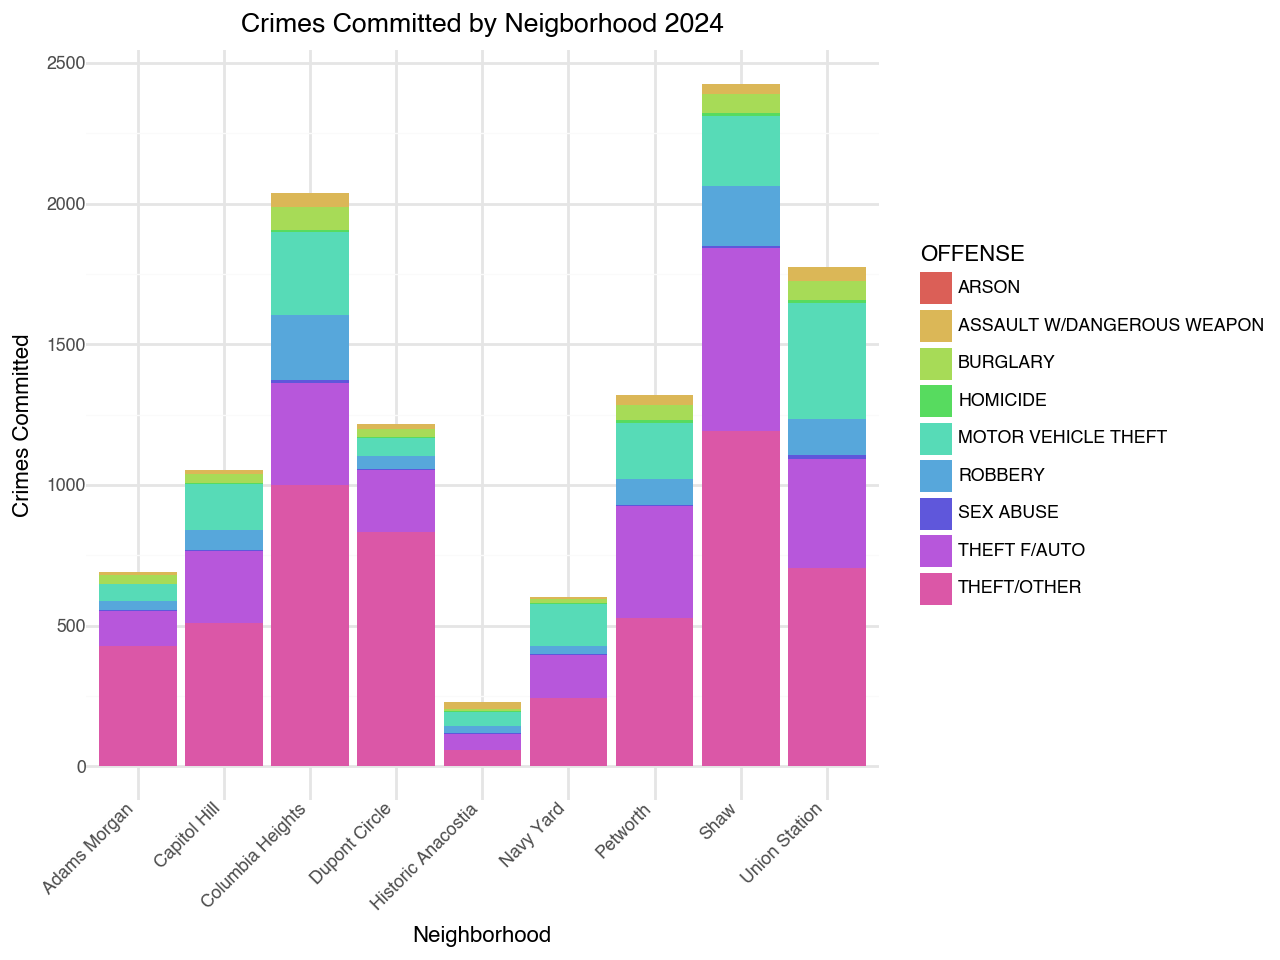

In [23]:
# step 1: data
crime_2024_plot = (ggplot(data=crime_data_clean) + 

# step 2: geom
 geom_bar(

# step 3: aesthethics as variable
     aes(x="NBH_NAMES", fill="OFFENSE"), stat="count") +

    theme_minimal(base_size=8) + 
    theme(axis_text_x=element_text(angle=45, hjust=1)) +


# step labels: edit the labels of the graph
labs(x="Neighborhood", y="Crimes Committed", title="Crimes Committed by Neigborhood 2024"))

crime_2024_plot

In [24]:
ggsave(crime_2024_plot, "../../data/open_data_dc/crime_2024.png")

#### Functions for merging data and plotting crime

In [342]:
##function to merge crime data by year 
def merge_df(cluster_csv, crime_csv, year):
    cluster = pd.read_csv(cluster_csv)
    crime = pd.read_csv(crime_csv)
    with_neighborhood_name = pd.merge(crime, cluster, how = "left", left_on = "NEIGHBORHOOD_CLUSTER", right_on = "NAME")
    with_neighborhoods_filter = with_neighborhood_name[with_neighborhood_name['NBH_NAMES'].str.contains(keywords, case=False, na=False)]
    with_name_filter = with_neighborhoods_filter.reset_index(drop = True)
    neighborhoods_cleaned = (with_name_filter.filter(["OFFENSE", "NEIGHBORHOOD_CLUSTER", "NBH_NAMES"]))
    neighborhoods_cleaned["COUNT"] = 1
    neighborhoods_cleaned['NBH_NAMES'] = [x.strip() for x in neighborhoods_cleaned['NBH_NAMES']]
    neighborhoods_cleaned['NBH_NAMES'] = [re.split(r', |/', x)for x in neighborhoods_cleaned['NBH_NAMES']]
    neighborhoods_cleaned['NBH_NAMES'] = neighborhoods_cleaned['NBH_NAMES'].apply(lambda x: [item for item in x if item in neighborhoods])
    crime_data_clean = neighborhoods_cleaned.explode("NBH_NAMES")
    crime_data_clean['YEAR'] = year
    crime_data_clean['TotalOffenseCount'] = crime_data_clean.groupby('OFFENSE')['OFFENSE'].transform('count')
    return crime_data_clean

In [27]:
##function to graph crime category by cluster
def crime_cluster(df, x, fill, year):
    plot = (ggplot(data=df) + 
    # step 2: geom
    geom_bar(

    # step 3: aesthethics as variable
     aes(x=x, fill=fill), stat="count") +

    theme_minimal(base_size=8) + 
    theme(axis_text_x=element_text(angle=45, hjust=1)) +


    # step labels: edit the labels of the graph
    labs(x="Neighborhood", y="Crimes Committed", title= "Crimes Committed by Neigborhood " + year))
    return plot

#### 2023 Data

In [344]:
crime_2023 = merge_df("../../data/open_data_dc/Neighborhood_Clusters.csv", "../../data/open_data_dc/Crime_Incidents_in_2023.csv", 2023)
crime_2023.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 26,Capitol Hill,1,2023,5966
1,THEFT F/AUTO,Cluster 7,Shaw,1,2023,3447
2,THEFT F/AUTO,Cluster 3,Shaw,1,2023,3447
3,THEFT F/AUTO,Cluster 25,Union Station,1,2023,3447
4,THEFT/OTHER,Cluster 26,Capitol Hill,1,2023,5966


In [250]:
crime_2023.shape

(14191, 7)

In [346]:
crime_2023.to_csv("../../data/open_data_dc/crime_2023.csv")

In [348]:
crime_2022 = merge_df("../../data/open_data_dc/Neighborhood_Clusters.csv", 
                      "../../data/open_data_dc/Crime_Incidents_in_2022.csv", 2022)
crime_2022.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 25,Union Station,1,2022,4844
1,BURGLARY,Cluster 18,Petworth,1,2022,419
2,THEFT/OTHER,Cluster 3,Shaw,1,2022,4844
3,THEFT F/AUTO,Cluster 2,Columbia Heights,1,2022,3564
4,THEFT/OTHER,Cluster 3,Shaw,1,2022,4844


In [256]:
crime_2022.shape

(11603, 7)

In [350]:
crime_2022.to_csv("../../data/open_data_dc/crime_2022.csv")

In [352]:
crime_2021 = merge_df("../../data/open_data_dc/Neighborhood_Clusters.csv", 
                      "../../data/open_data_dc/Crime_Incidents_in_2021.csv", 2021)
crime_2021.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT F/AUTO,Cluster 25,Union Station,1,2021,3744
1,MOTOR VEHICLE THEFT,Cluster 18,Petworth,1,2021,1524
2,THEFT F/AUTO,Cluster 6,Dupont Circle,1,2021,3744
3,MOTOR VEHICLE THEFT,Cluster 2,Columbia Heights,1,2021,1524
4,THEFT F/AUTO,Cluster 25,Union Station,1,2021,3744


In [262]:
crime_2021.shape

(12235, 7)

In [354]:
crime_2021.to_csv("../../data/open_data_dc/crime_2021.csv")

In [356]:
crime_2020 = merge_df("../../data/open_data_dc/Neighborhood_Clusters.csv", 
                      "../../data/open_data_dc/Crime_Incidents_in_2020.csv", 2020)
crime_2020.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 6,Dupont Circle,1,2020,4999
1,THEFT F/AUTO,Cluster 26,Capitol Hill,1,2020,3037
2,THEFT/OTHER,Cluster 3,Shaw,1,2020,4999
3,THEFT/OTHER,Cluster 26,Capitol Hill,1,2020,4999
4,THEFT/OTHER,Cluster 25,Union Station,1,2020,4999


In [358]:
crime_2020.to_csv("../../data/open_data_dc/crime_2020.csv")

In [360]:
crime_2019 = merge_df("../../data/open_data_dc/Neighborhood_Clusters.csv", 
                      "../../data/open_data_dc/Crime_Incidents_in_2019.csv", 2019)
crime_2019.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 3,Shaw,1,2019,6468
1,THEFT/OTHER,Cluster 25,Union Station,1,2019,6468
2,THEFT F/AUTO,Cluster 3,Shaw,1,2019,4793
3,THEFT F/AUTO,Cluster 1,Adams Morgan,1,2019,4793
4,THEFT F/AUTO,Cluster 3,Shaw,1,2019,4793


In [362]:
crime_2019.to_csv("../../data/open_data_dc/crime_2019.csv")

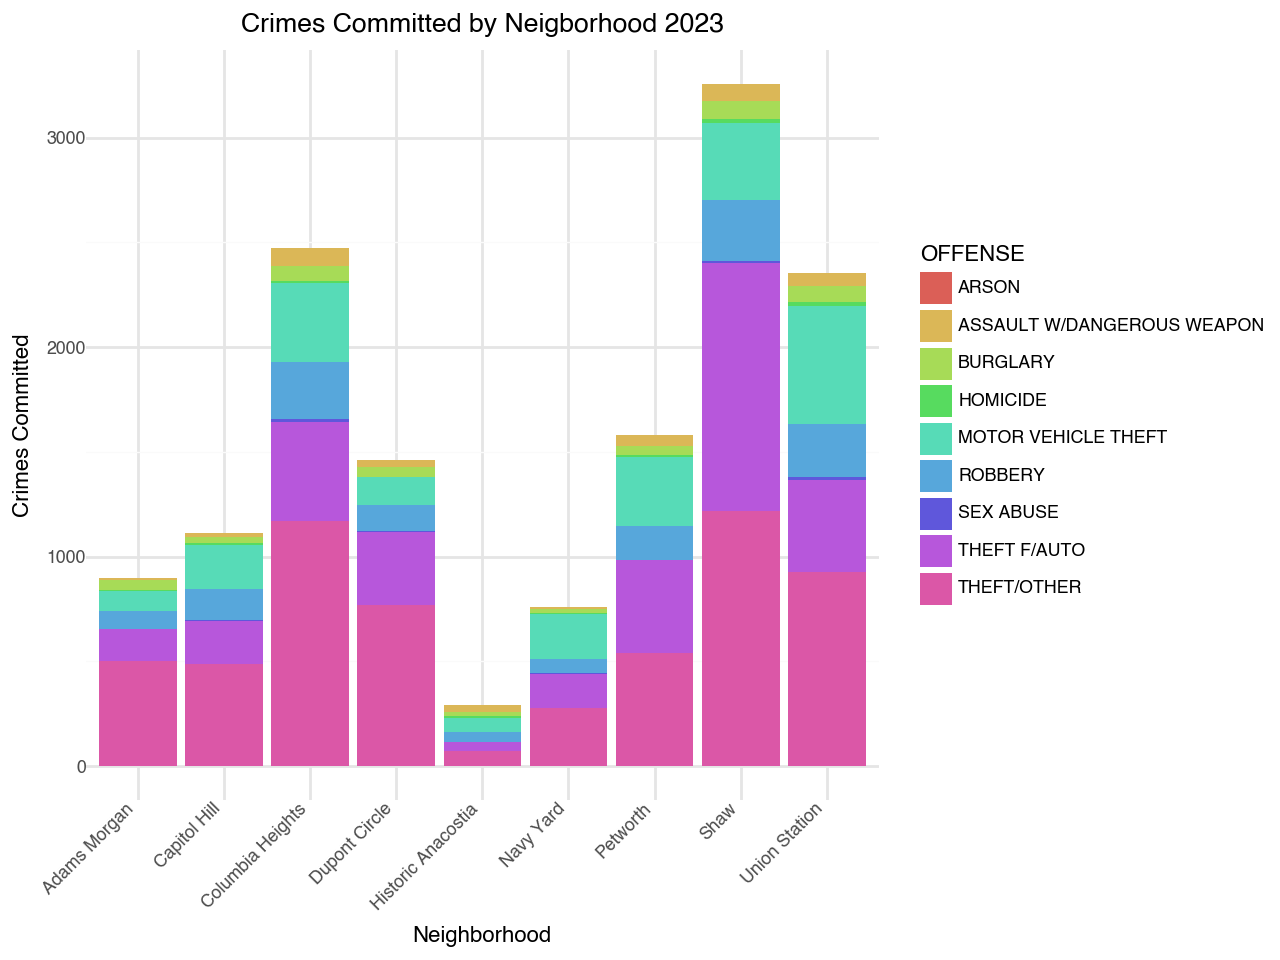

In [37]:
crime_plot_2023 = crime_cluster(crime_2023, "NBH_NAMES", "OFFENSE", '2023')
crime_plot_2023

In [38]:
ggsave(crime_plot_2023, "../../data/open_data_dc/crime_2023.png")

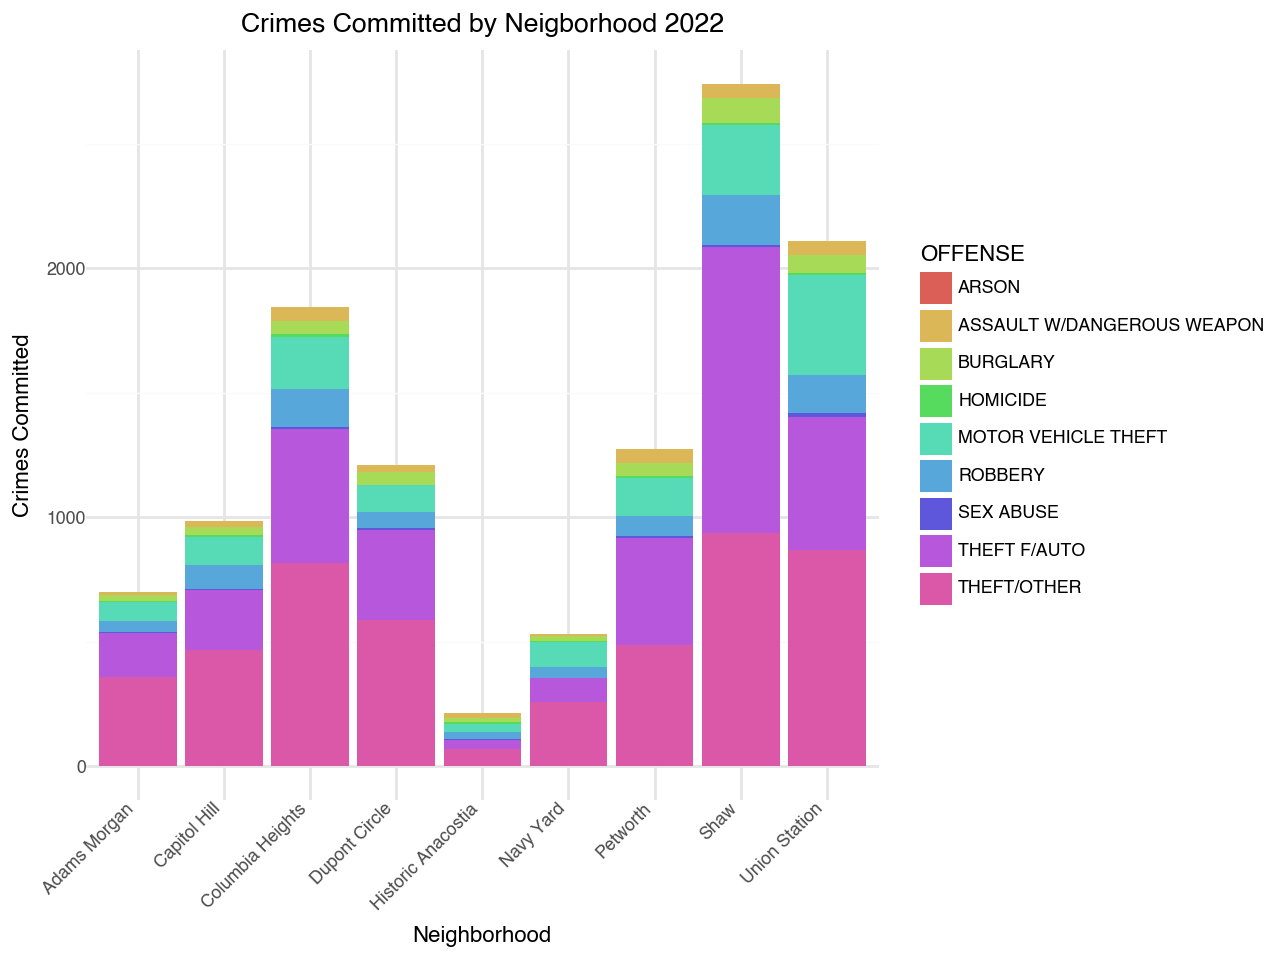

In [39]:
crime_plot_2022 = crime_cluster(crime_2022, "NBH_NAMES", "OFFENSE", '2022')
crime_plot_2022

In [40]:
ggsave(crime_plot_2022, "../../data/open_data_dc/crime_2022.png")

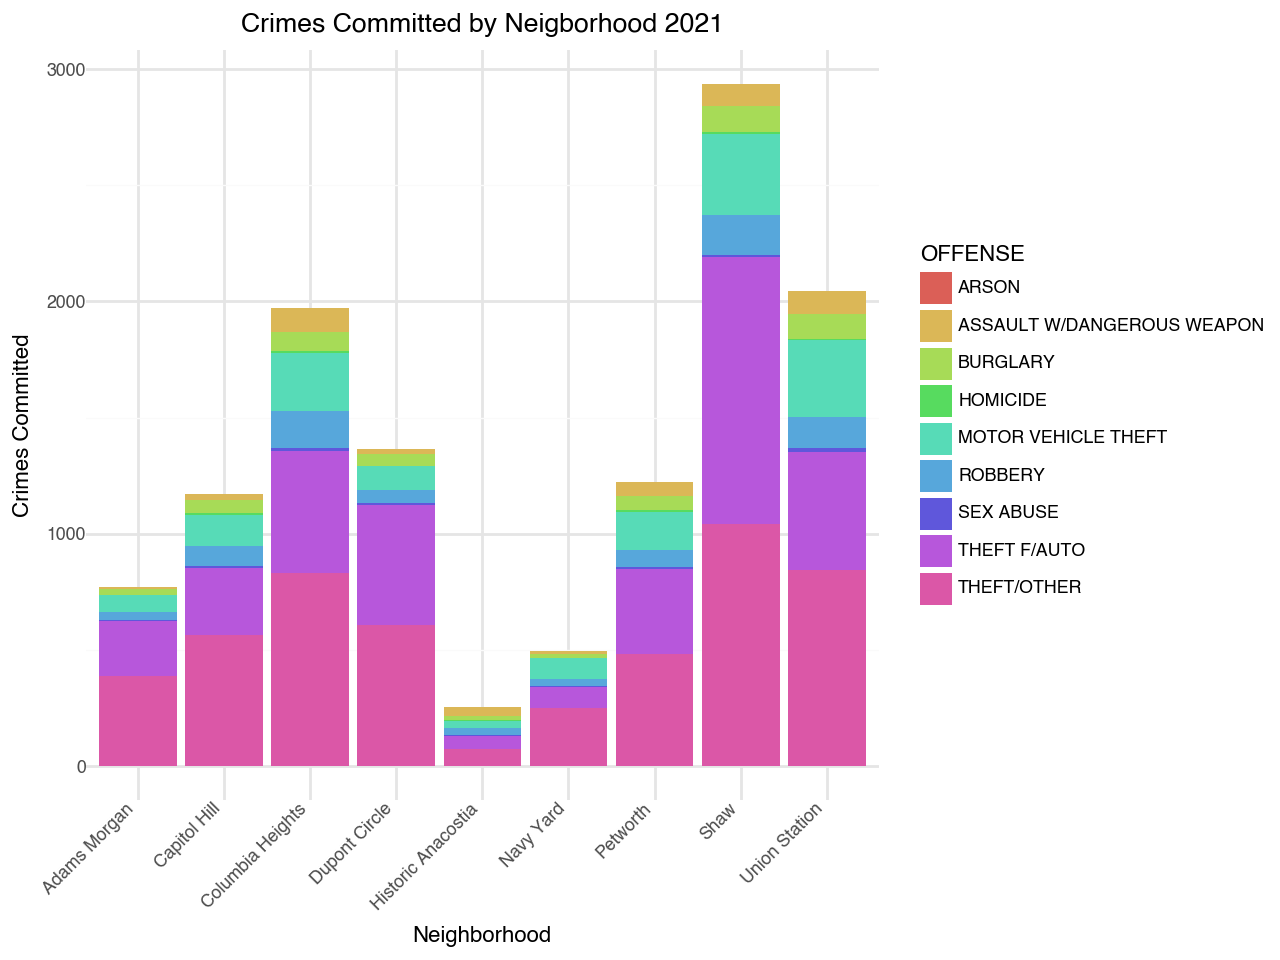

In [41]:
crime_plot_2021 = crime_cluster(crime_2021, "NBH_NAMES", "OFFENSE", '2021')
crime_plot_2021

In [42]:
ggsave(crime_plot_2021, "../../data/open_data_dc/crime_2021.png")

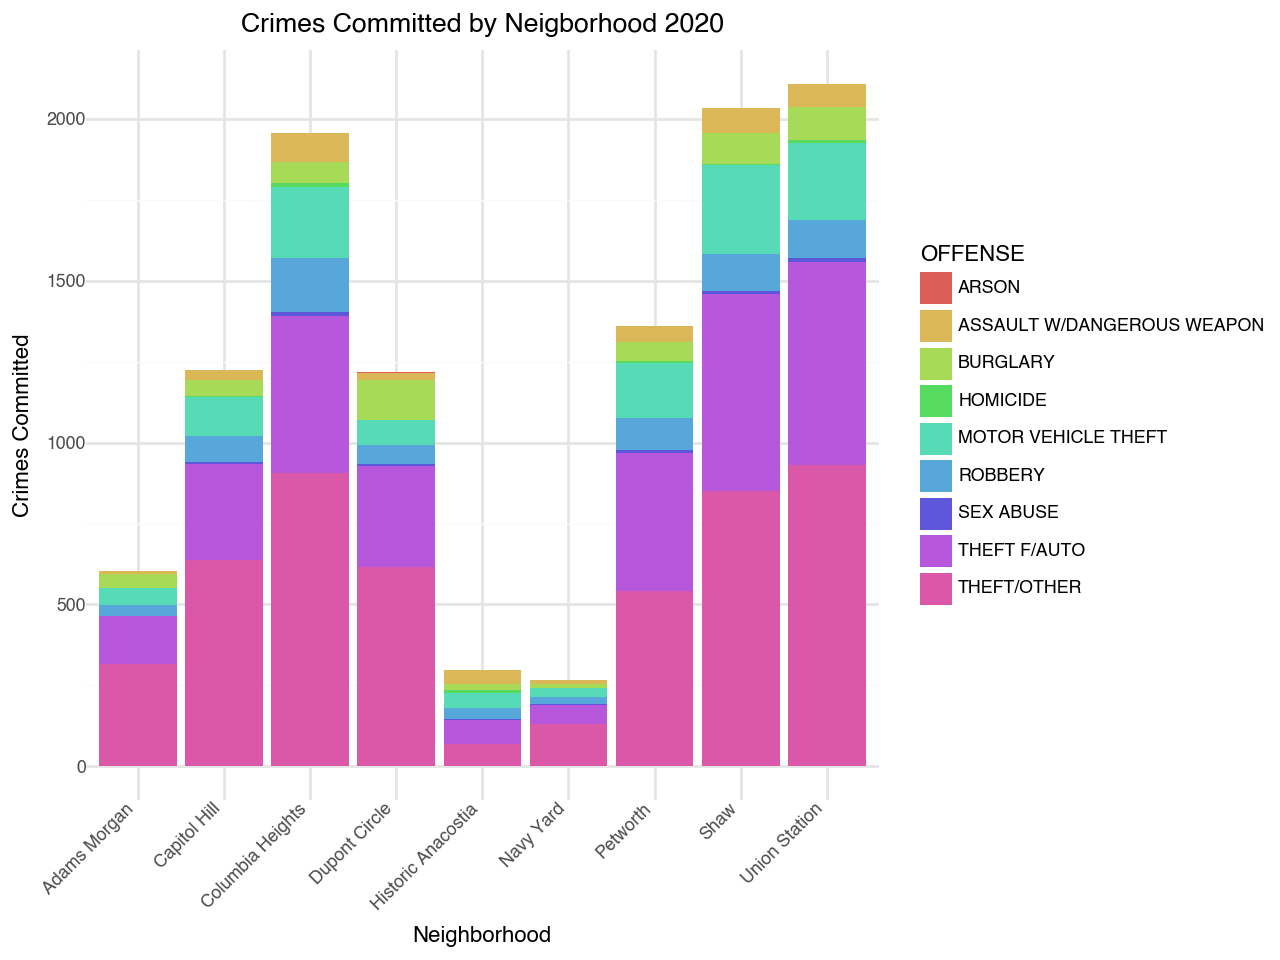

In [43]:
crime_plot_2020 = crime_cluster(crime_2020, "NBH_NAMES", "OFFENSE", '2020')
crime_plot_2020

In [44]:
ggsave(crime_plot_2020, "../../data/open_data_dc/crime_2020.png")

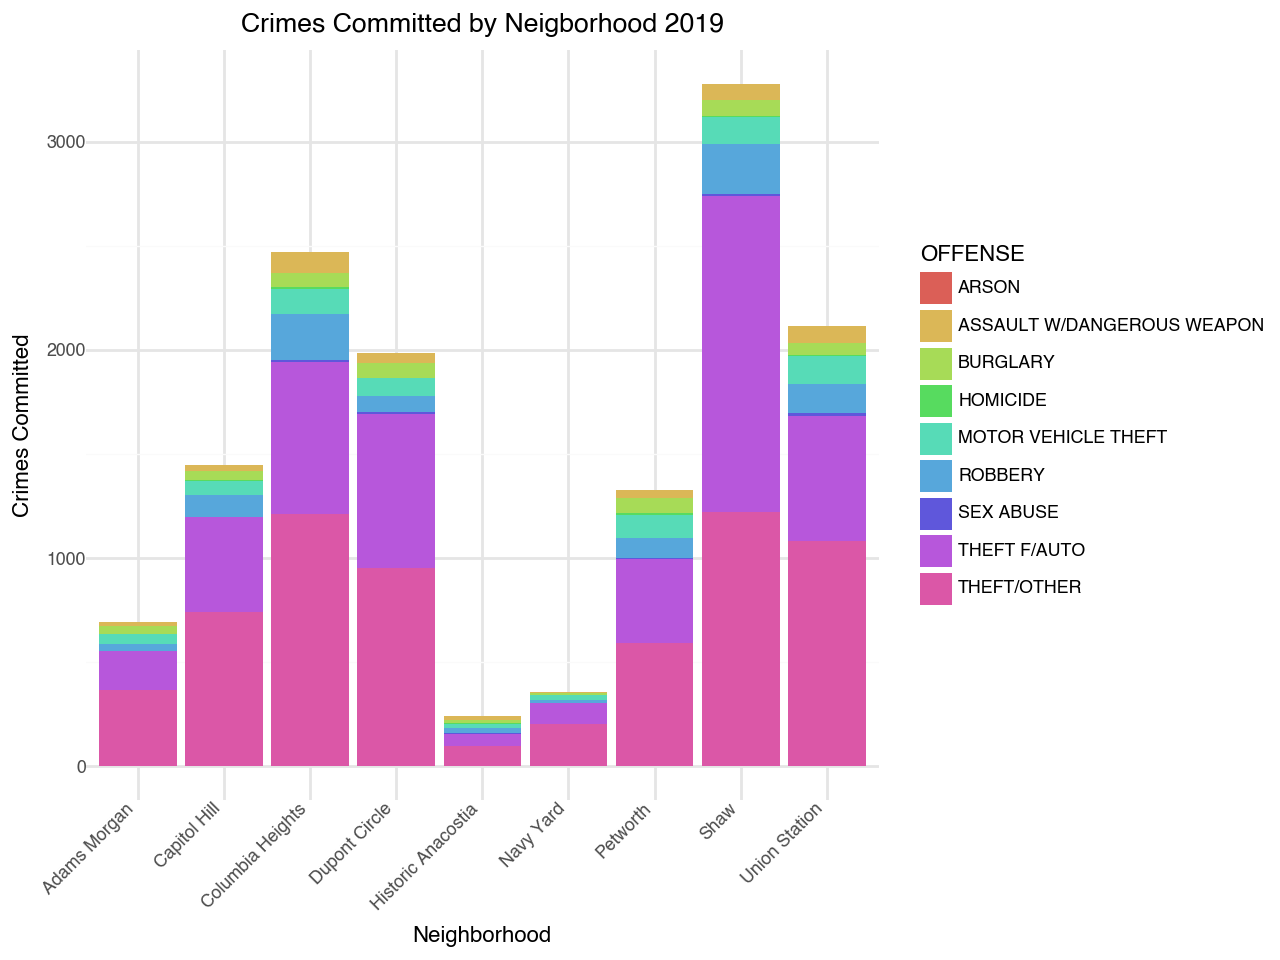

In [45]:
crime_plot_2019 = crime_cluster(crime_2019, "NBH_NAMES", "OFFENSE", '2019')
crime_plot_2019

In [46]:
ggsave(crime_plot_2019, "../../data/open_data_dc/crime_2019.png")